<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [35]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [36]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [37]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [38]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [39]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### TASK 1


Text(0.5, 1.0, 'Boxplot of Median value of owner-occupied homes')

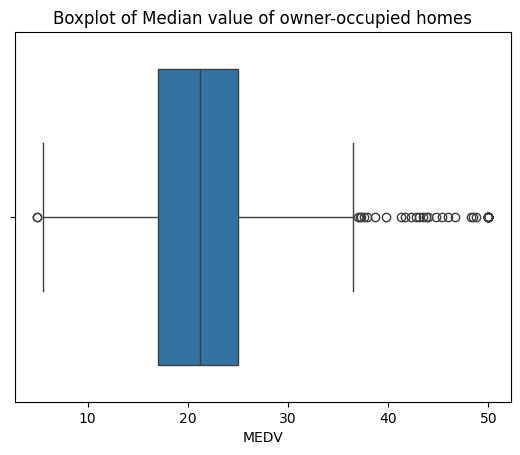

In [40]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(x=boston_df['MEDV'])
pyplot.title("Boxplot of Median value of owner-occupied homes")

Text(0.5, 1.0, 'Count of CHAS')

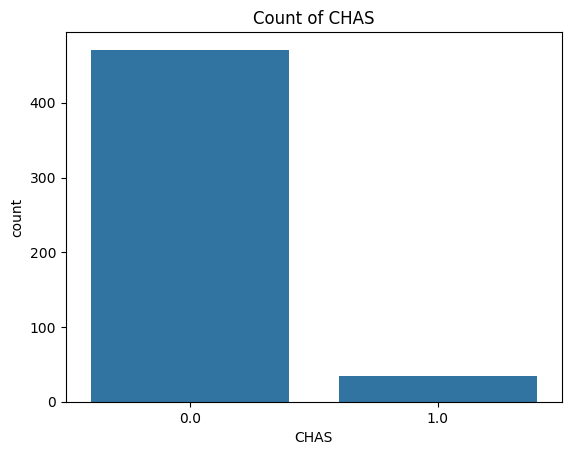

In [41]:
barChas=sns.countplot(x='CHAS', data=boston_df)
barChas.set_title('Count of CHAS')

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

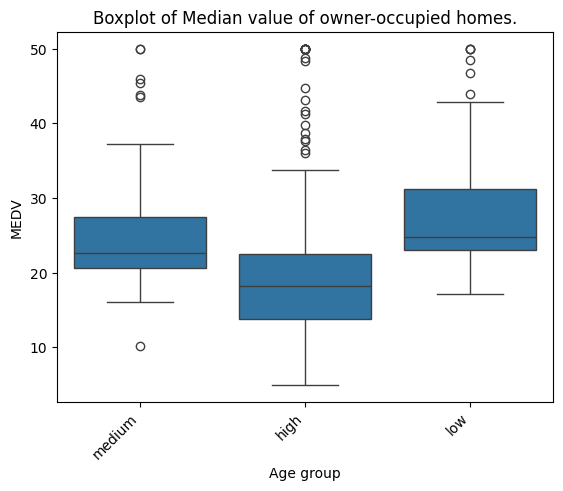

In [42]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[boston_df['AGE']<=35,'Age group']="low"
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'Age group']="medium"
boston_df.loc[boston_df['AGE']>=70,'Age group']="high"
#print(boston_df.head(20))

sns.boxplot(x='Age group', y='MEDV', data=boston_df)
pyplot.title("Boxplot of Median value of owner-occupied homes.")
pyplot.xticks(rotation=45, ha='right')

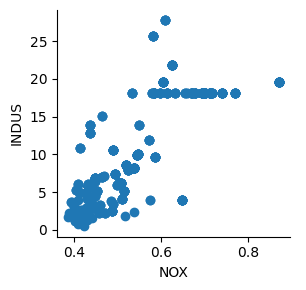

In [43]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
scat=sns.FacetGrid(boston_df)
scat=scat.map(pyplot.scatter, 'NOX', 'INDUS').add_legend()

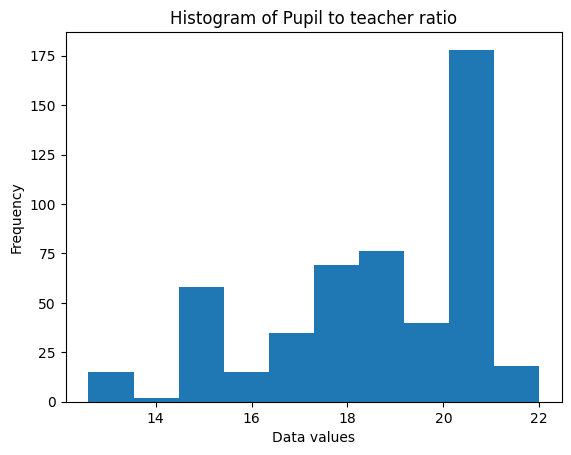

In [44]:
#Create a histogram for the pupil to teacher ratio variable
pyplot.hist(boston_df['PTRATIO'])
pyplot.xlabel("Data values")
pyplot.ylabel("Frequency")
pyplot.title("Histogram of Pupil to teacher ratio")
pyplot.show()

#### TASK 2

In [45]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)?
meanRiver=boston_df[boston_df['CHAS']==1]['MEDV'].mean()
meanNoRiver=boston_df[boston_df['CHAS']==0]['MEDV'].mean()
print("Mean of Median value of houses bounded by the Charles River:", meanRiver)
print("Mean of Median value of houses not bounded by the Charles River:", meanNoRiver)

print("\n\nBefore apply t-test, use Levene Test to prove the equal variances hypotesis, alpha=0.05\n")
print("H0: both samples have the same variance")
print("H1: both samples have different variance")
stat,pVal=scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'], center='mean')
print("The p-value is:",pVal)
print("The p-values is less than alpha=0.05, therefore, reject H0, i.e., the variances are diferent significantly")

print("\n\nNow, apply t-test to determine if both samples are drawn from populations with the same mean, alpha=0.05\n")
print("H0: Samples on both groups are drawn from populations with the same mean.")
print("H1: Samples on both groups are drawn from populations with diffetent mean.")
stat,pVal=scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'], equal_var=False, alternative='two-sided')
print(f"The p-value ({pVal}) is less than 0.05.")

print("\n\nConclusion:\nTherefore, we reject the null hypotesis. In others words, the mean of both groups are different significantly.")

Mean of Median value of houses bounded by the Charles River: 28.439999999999998
Mean of Median value of houses not bounded by the Charles River: 22.093842887473464


Before apply t-test, use Levene Test to prove the equal variances hypotesis, alpha=0.05

H0: both samples have the same variance
H1: both samples have different variance
The p-value is: 0.003238119367639829
The p-values is less than alpha=0.05, therefore, reject H0, i.e., the variances are diferent significantly


Now, apply t-test to determine if both samples are drawn from populations with the same mean, alpha=0.05

H0: Samples on both groups are drawn from populations with the same mean.
H1: Samples on both groups are drawn from populations with diffetent mean.
The p-value (0.003567170098137517) is less than 0.05.


Conclusion:
Therefore, we reject the null hypotesis. In others words, the mean of both groups are different significantly.


In [46]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
low_age=boston_df[boston_df['Age group']=='low']
med_age=boston_df[boston_df['Age group']=='medium']
high_age=boston_df[boston_df['Age group']=='high']

print(f"Low AGE media={low_age['MEDV'].mean()}")
print(f"Medium AGE media={med_age['MEDV'].mean()}")
print(f"High AGE media={high_age['MEDV'].mean()}")

print("\n\nFirst, we verify variance equality, alpha=0.05\n")
print("Let H0: Samples on all groups are drawn from populations with the same variance.")
print("Let H1: Samples on all groups are drawn from populations with diffetent variance.")
staLev,pVal=scipy.stats.levene(low_age['MEDV'],med_age['MEDV'],high_age['MEDV'], center='mean')
print(f"Statistic={staLev}, p-value={pVal}")
print(f"The p-value {pVal} is not less than 0.05, therefore, we don't rejec H0, i.e., samples on all groups have the same variance.")

print("\n\nNow, we apply ANOVA, alpha=0.05\n")
staFoW, pValF=scipy.stats.f_oneway(low_age['MEDV'], med_age['MEDV'], high_age['MEDV'])
print(f"The p-value for ANOVA one way test is {pValF}.")

print("\n\nConclusion:\nTherefore we reject H0, i.e., the mean of all groups are different significantly.")

Low AGE media=27.77582417582417
Medium AGE media=24.94765625
High AGE media=19.793379790940765


First, we verify variance equality, alpha=0.05

Let H0: Samples on all groups are drawn from populations with the same variance.
Let H1: Samples on all groups are drawn from populations with diffetent variance.
Statistic=2.7806200293748304, p-value=0.06295337343259205
The p-value 0.06295337343259205 is not less than 0.05, therefore, we don't rejec H0, i.e., samples on all groups have the same variance.


Now, we apply ANOVA, alpha=0.05

The p-value for ANOVA one way test is 1.7105011022702984e-15.


Conclusion:
Therefore we reject H0, i.e., the mean of all groups are different significantly.


In [47]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

print("\nWe apply the PearsonR test, with alpha=0.05")
print("H0: There is no association between Nitric oxide concentrations and proportion of non-retail business acres per town.")
print("H1: There is an association between Nitric oxide concentrations and proportion of non-retail business acres per town.")
r,pValR=scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("\n\nConclusion:")
print(f"The p-value ({pValR}) is less than 0.05, therefore, we reject the null hypotesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


We apply the PearsonR test, with alpha=0.05
H0: There is no association between Nitric oxide concentrations and proportion of non-retail business acres per town.
H1: There is an association between Nitric oxide concentrations and proportion of non-retail business acres per town.


Conclusion:
The p-value (7.913361061210442e-98) is less than 0.05, therefore, we reject the null hypotesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [48]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
import statsmodels.api as sm

X=boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
predictions=model.predict(X)

model.summary()

print("\nConclusion:")
print(f"The p-value ({pValR}) is less than 0.05, therefore, we reject the null hypotesis and conclude that there exists a relationship between weighted distance to the five Boston employment centres and the median value of owner occupied homes")
print(f"An additional unit increase in the weighted distance to the five Boston employment centers is associated with an increase of 1.0916 units in the median value of owner-occupied homes, holding all other variables constant.")



Conclusion:
The p-value (7.913361061210442e-98) is less than 0.05, therefore, we reject the null hypotesis and conclude that there exists a relationship between weighted distance to the five Boston employment centres and the median value of owner occupied homes
An additional unit increase in the weighted distance to the five Boston employment centers is associated with an increase of 1.0916 units in the median value of owner-occupied homes, holding all other variables constant.
